# The odd graph with evens removed looks like

We prviously looked at the Collatz Chains associated with numbers having 2x+1 and 2x-1 relationships

In this view we see that a 4x+1 relationship often holds across Collatz Numbers that are in the same level of the odd-only tree.

We know these numbers have to be _close_ to each other and be seperated by a valid odd propagator like $2n+1$, $4n+1$, $4n+3$, etc

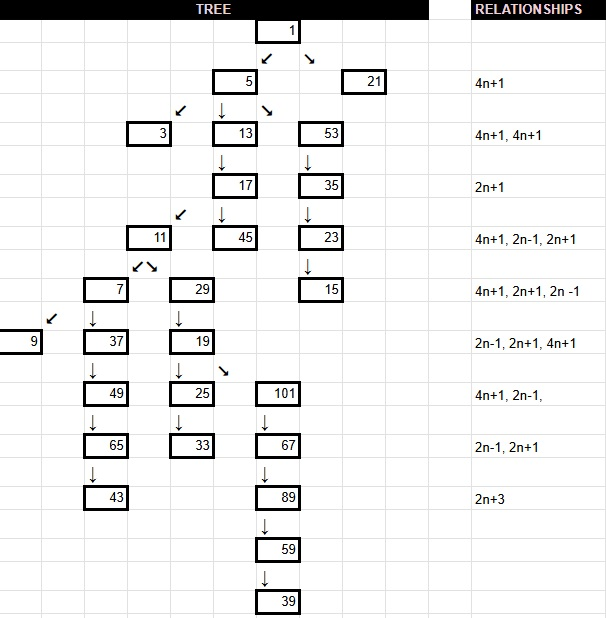

In [2]:
import sys, io
import math
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from fractions import Fraction
from sympy import factorint

In [34]:
def CollatzChain(collatzNumber):
    chain = [collatzNumber]
    while collatzNumber != 1:
        if collatzNumber & 1 == 0:
            collatzNumber = collatzNumber // 2
        else:
            collatzNumber = (3 * collatzNumber + 1) // 2
        chain.append(collatzNumber)
    return chain
#

def ChainPath(collatzNumber):
    path = []
    while collatzNumber != 1:
        if (collatzNumber & 1) == 0:
            collatzNumber = collatzNumber // 2
            path.append("1")
        else:
            collatzNumber = (3 * collatzNumber + 1) // 2
            path.append("0")
    return "".join(path)
#
def fractionFromNodeTup(tup):
    p2, p3, c = tup
    fract = Fraction(2**p2 - c, 3**p3)
    return (fract.numerator, fract.denominator)
#

def TupChainFromPath(chain_path):
    tup_chain = [(0, 0, 0)]
    for chain_item in chain_path:
        p2, p3, c = tup_chain[-1]
        if chain_item == "1":
            tup_chain. append((p2 + 1, p3, c))
        else:
            tup_chain. append((p2 + 1, p3 + 1, c*3 + 2**p2))
            
        fract = fractionFromNodeTup(tup_chain[-1])
    return tup_chain
#
def downUpTup(tup):
    p2, p3, c = tup
    p2_01, p3_01, c_01 = (p2 + 2, p3 + 1, c*3 + 2**p2)
    return (p2_01, p3_01, c_01)
#
def TupChain(collatzNumber):
    chain_path = ChainPath(collatzNumber)
    return TupChainFromPath(chain_path)
    return tup_chain
#
def generationTups(n):
    G = [[(0, 0, 0)]]
    for i in range(1, n+1, 1):
        G.append([])
        tups = G[i-1]
        for tup in tups:
            p2, p3, c = tup
            G[i].extend([(p2 + 1, p3, c), (p2 + 1, p3 + 1, c*3 + 2**p2)])
    return G
#

def reverseColllatz(collatz_num, generations):
    chains = [[collatz_num]]
    for i in range(generations):
        for chain in chains.copy():
            if ((chain[-1] -1) % 3) == 0:
                reverse_down_val = (chain[-1] - 1)//3
                if (reverse_down_val & 1) == 1:
                    # down only applies to odds
                    chain2 = chain.copy()
                    chain2.append(reverse_down_val)
                    chains.append(chain2)
            chain = chain.append(2*chain[-1])
    #
    return chains
#
                

In [4]:
len(CollatzChain(39))

24

In [5]:
[ChainPath(5), ChainPath(21)]

['0111', '011111']

In [6]:
TupChainFromPath('01111111')

[(0, 0, 0),
 (1, 1, 1),
 (2, 1, 1),
 (3, 1, 1),
 (4, 1, 1),
 (5, 1, 1),
 (6, 1, 1),
 (7, 1, 1),
 (8, 1, 1)]

In [7]:
fractionFromNodeTup((8,1,1))

(85, 1)

# All Odd integers contain one of $X_{i+1} = 4X_{i} + 1;\ X_0 = 5$ in their orbit to 1

It is clear that all odd integers generated by the series $x_{i+1} = 4x_{i} + 1;\ X_0 = 5$ are in the lattice 

It is also clear that these numbers are always the last odd number in their orbit before 1 for all odd numbers

This is an increasingly smaller fraction of all odd numbers of the form $4x + 1$ as $x\ \rightarrow \infty$

In effect, each of these numbers is an anchor of an entire tree of Collatz numbers

In [8]:
x = 5
print((x, ChainPath(x)))
for i in range(40):
    x = 4*(x) + 1
    print((x, ChainPath(x)))

(5, '0111')
(21, '011111')
(85, '01111111')
(341, '0111111111')
(1365, '011111111111')
(5461, '01111111111111')
(21845, '0111111111111111')
(87381, '011111111111111111')
(349525, '01111111111111111111')
(1398101, '0111111111111111111111')
(5592405, '011111111111111111111111')
(22369621, '01111111111111111111111111')
(89478485, '0111111111111111111111111111')
(357913941, '011111111111111111111111111111')
(1431655765, '01111111111111111111111111111111')
(5726623061, '0111111111111111111111111111111111')
(22906492245, '011111111111111111111111111111111111')
(91625968981, '01111111111111111111111111111111111111')
(366503875925, '0111111111111111111111111111111111111111')
(1466015503701, '011111111111111111111111111111111111111111')
(5864062014805, '01111111111111111111111111111111111111111111')
(23456248059221, '0111111111111111111111111111111111111111111111')
(93824992236885, '011111111111111111111111111111111111111111111111')
(375299968947541, '0111111111111111111111111111111111111111111

In [9]:
# The 01 0111 011111 give us 1/3, 7/3, 31/3 ...
fractionFromNodeTup((1, 1, 1)), fractionFromNodeTup((3, 1, 1)), fractionFromNodeTup((5, 1, 1))

((1, 3), (7, 3), (31, 3))

In [10]:
x = 5
for i in range((341-1)//4):
    y = 4*(i+1) + 1
    chain_path = ChainPath(y)
    if y == x:
        print((y, len(chain_path), chain_path))
        x = 4*(x) + 1
    else:
        print(("--", y, len(chain_path), chain_path))

(5, 4, '0111')
('--', 9, 13, '0100010110111')
('--', 13, 7, '0110111')
('--', 17, 9, '010110111')
(21, 6, '011111')
('--', 25, 16, '0100110010110111')
('--', 29, 13, '0110010110111')
('--', 33, 18, '010100110010110111')
('--', 37, 15, '011100010110111')
('--', 41, 69, '010000010100100010000101100010010000001100001110101011101100011110111')
('--', 45, 12, '011010110111')
('--', 49, 17, '01011100010110111')
('--', 53, 9, '011110111')
('--', 57, 22, '0100101011100010110111')
('--', 61, 14, '01100011110111')
('--', 65, 19, '0101011100010110111')
('--', 69, 11, '01110110111')
('--', 73, 73, '0100011000010100100010000101100010010000001100001110101011101100011110111')
('--', 77, 16, '0110110010110111')
('--', 81, 16, '0101100011110111')
(85, 8, '01111111')
('--', 89, 21, '010011100110010110111')
('--', 93, 13, '0110011110111')
('--', 97, 75, '010100011000010100100010000101100010010000001100001110101011101100011110111')
('--', 101, 18, '011100110010110111')
('--', 105, 26, '0100001101110011001

# 4x+1 numbers by generation

## Generation 7

- Descend through 5:
    - i=3, ('--', 13, 7, '0110111')

## Generation 9
One per gap between Orbit Level-1 4x+1 series number

- Descend through 5:
    - i=4, ('--', 17, 9, '010110111')
    - i=13, ('--', 53, 9, '011110111')
  
## Generation 11

- Descend through 5:
    - ('--', 69, 11, '01110110111')

## Generation 13 
One per gap between Orbit Level-1 4x+1 series number

- Descend through 5:
    - i=2, ('--', 9, 13, '0100010110111')
    - i=7, ('--', 29, 13, '0110010110111')
    - i=23, ('--', 93, 13, '0110011110111')
- Descend through 85:
    - i=75, ('--', 301, 13, '0110101111111')
 
## Generation 15

- Descend through 5:
    - i=29, ('--', 117, 15, '011110010110111')
 
## Generation 16
Both between 21 amd 85

- Descend through 5:
    - ('--', 25, 16, '0100110010110111')
    - ('--', 77, 16, '0110110010110111')


In [11]:
# find all 4x+1 odd ints in a generation using generated chain_path
def gen_4n_plus_1(generation):
    L = []
    N = generation - 3
    for i in range(2**N):
        body = f"{i:0{N}b}"
        chain_path =  body + "111"
        frac_tup = fractionFromNodeTup(TupChainFromPath(chain_path)[-1])
        if frac_tup[1] == 1:
            if (frac_tup[0] % 4) == 1:
                L.append(frac_tup[0])
    return L
#


In [12]:
for i in range(4, 22, 1):
    print((i, gen_4n_plus_1(i)))

(4, [5])
(5, [])
(6, [21])
(7, [13])
(8, [85])
(9, [17, 53])
(10, [113, 341])
(11, [69, 213])
(12, [45, 141, 453, 1365])
(13, [9, 29, 93, 301, 909, 277, 853])
(14, [201, 61, 605, 181, 565, 1813, 5461])
(15, [401, 369, 1137, 37, 117, 373, 1205, 3637, 1109, 3413])
(16, [25, 81, 241, 753, 2417, 7281, 77, 805, 245, 2421, 725, 2261, 7253, 21845])
(17, [537, 49, 497, 4849, 1613, 1605, 1477, 4549, 149, 469, 1493, 4821, 14549, 4437, 13653])
(18, [985, 3033, 33, 321, 1073, 1069, 3213, 2957, 9101, 101, 325, 965, 3013, 9669, 29125, 309, 3221, 981, 9685, 2901, 9045, 29013, 87381])
(19, [713, 217, 2009, 19417, 65, 6465, 1969, 6065, 625, 2141, 6445, 205, 653, 1933, 6029, 19341, 58253, 2149, 197, 1989, 19397, 6453, 6421, 5909, 18197, 597, 1877, 5973, 19285, 58197, 17749, 54613])
(20, [4297, 441, 1433, 1313, 1425, 433, 4017, 38833, 12913, 12893, 1325, 4301, 397, 3981, 38797, 3941, 12133, 133, 1285, 4293, 4277, 12853, 11829, 36405, 405, 1301, 3861, 12053, 38677, 116501, 1237, 12885, 3925, 38741, 11605,

In [13]:
def filter_4n_plus1(L):
    M = []
    for x in L:
        if (x % 4) == 1:
            M.append(x)
    return M
#

def gen_4n_plus_1_orbits(generation):
    L = []
    N = generation - 3
    for i in range(2**N):
        body = f"{i:0{N}b}"
        chain_path =  body + "111"
        frac_tup = fractionFromNodeTup(TupChainFromPath(chain_path)[-1])
        if frac_tup[1] == 1:
            if (frac_tup[0] % 4) == 1:
                L.append(filter_4n_plus1(CollatzChain(frac_tup[0])))
    return L
#


In [14]:
gen_4n_plus_1_orbits(13)

[[9, 17, 13, 5, 1],
 [29, 17, 13, 5, 1],
 [93, 53, 5, 1],
 [301, 113, 85, 1],
 [909, 341, 1],
 [277, 13, 5, 1],
 [853, 5, 1]]

In [15]:
for i in range(4, 22, 1):
    print((i, gen_4n_plus_1_orbits(i)))

(4, [[5, 1]])
(5, [])
(6, [[21, 1]])
(7, [[13, 5, 1]])
(8, [[85, 1]])
(9, [[17, 13, 5, 1], [53, 5, 1]])
(10, [[113, 85, 1], [341, 1]])
(11, [[69, 13, 5, 1], [213, 5, 1]])
(12, [[45, 17, 13, 5, 1], [141, 53, 5, 1], [453, 85, 1], [1365, 1]])
(13, [[9, 17, 13, 5, 1], [29, 17, 13, 5, 1], [93, 53, 5, 1], [301, 113, 85, 1], [909, 341, 1], [277, 13, 5, 1], [853, 5, 1]])
(14, [[201, 341, 1], [61, 53, 5, 1], [605, 341, 1], [181, 17, 13, 5, 1], [565, 53, 5, 1], [1813, 85, 1], [5461, 1]])
(15, [[401, 301, 113, 85, 1], [369, 277, 13, 5, 1], [1137, 853, 5, 1], [37, 17, 13, 5, 1], [117, 17, 13, 5, 1], [373, 53, 5, 1], [1205, 113, 85, 1], [3637, 341, 1], [1109, 13, 5, 1], [3413, 5, 1]])
(16, [[25, 29, 17, 13, 5, 1], [81, 61, 53, 5, 1], [241, 181, 17, 13, 5, 1], [753, 565, 53, 5, 1], [2417, 1813, 85, 1], [7281, 5461, 1], [77, 29, 17, 13, 5, 1], [805, 341, 1], [245, 53, 5, 1], [2421, 341, 1], [725, 17, 13, 5, 1], [2261, 53, 5, 1], [7253, 85, 1], [21845, 1]])
(17, [[537, 605, 341, 1], [49, 37, 17, 13, 5

In [16]:
for i in range(4, 27, 1):
    LL = gen_4n_plus_1_orbits(i)
    for chain in LL:
        N = len(chain)
        monotonic = True
        chain_val = chain[N-1]
        for j in range(N-2, -1, -1):
            if chain[j] < chain_val:
                monotonic = False
                if j > 0:
                    print(i, chain[0], monotonic, (j+1, N))
                break
            chain_val = chain[j]
        

18 33 False (2, 7)
20 1313 False (2, 6)
20 133 False (2, 7)
21 289 False (2, 6)
21 25889 False (2, 4)
22 633 False (2, 6)
22 1785 False (2, 6)
22 5729 False (2, 5)
22 177 False (3, 8)
22 1901 False (2, 6)
22 5357 False (2, 6)
22 5253 False (2, 6)
22 533 False (2, 7)
23 1273 False (2, 6)
23 10785 False (2, 6)
23 385 False (3, 7)
23 3821 False (2, 6)
23 3501 False (3, 7)
23 1157 False (2, 6)
23 103557 False (2, 4)
24 777 False (3, 7)
24 761 False (2, 8)
24 2333 False (3, 7)
24 2541 False (2, 6)
24 237 False (2, 8)
24 2285 False (2, 8)
24 69037 False (3, 5)
24 2533 False (2, 6)
24 7141 False (2, 6)
24 22917 False (2, 5)
24 709 False (3, 8)
24 7605 False (2, 6)
24 21429 False (2, 6)
24 21013 False (2, 6)
24 2133 False (2, 7)
25 1689 False (3, 7)
25 4761 False (3, 7)
25 473 False (3, 8)
25 1697 False (3, 7)
25 1569 False (2, 8)
25 513 False (4, 8)
25 1693 False (2, 6)
25 157 False (2, 8)
25 15277 False (3, 6)
25 5069 False (3, 7)
25 14285 False (3, 7)
25 1421 False (3, 8)
25 5093 False (2, 

# 4n+1 -only Orbits can be non-monotonic
It is just that when chains are short, there is little room to wiggle, but once we get over generation 18 and 4n+1 -only orbits start to have lengths greater than 5 we start to see more non-monotonic 4n+1 orbits

In [17]:
filter_4n_plus1(CollatzChain(33))

[33, 25, 29, 17, 13, 5, 1]

In [18]:
CollatzChain(33)

[33, 50, 25, 38, 19, 29, 44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]

In [19]:
CollatzChain(9)

[9, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]

In [20]:
ChainPath(9)

'0100010110111'

In [21]:
# Can I just append '11' to 9's chain_path whose orbit goes through 5 to get a parallel integer whose orbit goes through 21?
TupChainFromPath('010001011011111')

[(0, 0, 0),
 (1, 1, 1),
 (2, 1, 1),
 (3, 2, 7),
 (4, 3, 29),
 (5, 4, 103),
 (6, 4, 103),
 (7, 5, 373),
 (8, 5, 373),
 (9, 5, 373),
 (10, 6, 1631),
 (11, 6, 1631),
 (12, 6, 1631),
 (13, 6, 1631),
 (14, 6, 1631),
 (15, 6, 1631)]

In [22]:
fractionFromNodeTup((15, 6, 1631))
# No

(10379, 243)

In [23]:
print(ChainPath(5))
print(ChainPath(3))
print(ChainPath(13))

0111
00111
0110111


### So the path from 3 to 13 via 5 is
$F_{↑}(F_{↑}(F_{↑}(F_{↓}(F_{↑}(F_{↑}(F_{↓}(\ \ F_{↓}^{-1}(F_{↓}^{-1}(F_{↑}^{-1}(F_{↑}^{-1}(F_{↑}^{-1}(3)))))\ \  )))))))$

Note the $(F_{↓}(\ \ F_{↓}^{-1}(...)) $ that could be eliminated to pass through $\frac{1}{3}$ instead of $5$

In [24]:
"00111"[-4:]

'0111'

In [25]:
"0110111"[-6:]

'110111'

In [26]:
fractionFromNodeTup(TupChainFromPath("_0000000000000001100111")[-1])

(-42194753, 43046721)

In [27]:
reverseColllatz(21, 8)

[[21, 42, 84, 168, 336, 672, 1344, 2688, 5376]]

In [28]:
reverseColllatz(85, 24)

[[85,
  170,
  340,
  680,
  1360,
  2720,
  5440,
  10880,
  21760,
  43520,
  87040,
  174080,
  348160,
  696320,
  1392640,
  2785280,
  5570560,
  11141120,
  22282240,
  44564480,
  89128960,
  178257920,
  356515840,
  713031680,
  1426063360],
 [85,
  28,
  56,
  112,
  224,
  448,
  896,
  1792,
  3584,
  7168,
  14336,
  28672,
  57344,
  114688,
  229376,
  458752,
  917504,
  1835008,
  3670016,
  7340032,
  14680064,
  29360128,
  58720256,
  117440512,
  234881024],
 [85,
  28,
  9,
  18,
  36,
  72,
  144,
  288,
  576,
  1152,
  2304,
  4608,
  9216,
  18432,
  36864,
  73728,
  147456,
  294912,
  589824,
  1179648,
  2359296,
  4718592,
  9437184,
  18874368,
  37748736],
 [85,
  170,
  340,
  113,
  226,
  452,
  904,
  1808,
  3616,
  7232,
  14464,
  28928,
  57856,
  115712,
  231424,
  462848,
  925696,
  1851392,
  3702784,
  7405568,
  14811136,
  29622272,
  59244544,
  118489088,
  236978176],
 [85,
  28,
  56,
  112,
  37,
  74,
  148,
  296,
  592,
  1184,


In [35]:
reverseColllatz(85, 6)

[[85, 170, 340, 680, 1360, 2720, 5440],
 [85, 170, 340, 113, 226, 452, 904],
 [85, 170, 340, 680, 1360, 453, 906],
 [85, 170, 340, 113, 226, 75, 150]]

In [31]:
CollatzChain(37)

[37, 56, 28, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]

In [36]:
def filter_odd(L):
    M = []
    for x in L:
        if (x % 2) == 1:
            M.append(x)
    return M
#

descendents_85_odd = []
for L in reverseColllatz(85, 24):
    LL = filter_odd(L)
    descendents_85_odd.append(LL)
descendents_85_odd

[[85],
 [85, 113],
 [85, 453],
 [85, 113, 75],
 [85, 1813],
 [85, 113, 301],
 [85, 7253],
 [85, 113, 1205],
 [85, 1813, 2417],
 [85, 113, 301, 401],
 [85, 29013],
 [85, 113, 4821],
 [85, 7253, 4835],
 [85, 113, 1205, 803],
 [85, 1813, 9669],
 [85, 113, 301, 1605],
 [85, 1813, 2417, 1611],
 [85, 113, 301, 401, 267],
 [85, 116053],
 [85, 113, 19285],
 [85, 7253, 19341],
 [85, 113, 1205, 3213],
 [85, 7253, 4835, 3223],
 [85, 113, 1205, 803, 535],
 [85, 1813, 38677],
 [85, 113, 301, 6421],
 [85, 1813, 2417, 6445],
 [85, 113, 301, 401, 1069],
 [85, 464213],
 [85, 113, 77141],
 [85, 7253, 77365],
 [85, 113, 1205, 12853],
 [85, 7253, 4835, 12893],
 [85, 113, 1205, 803, 2141],
 [85, 1813, 154709],
 [85, 113, 301, 25685],
 [85, 1813, 2417, 25781],
 [85, 113, 301, 401, 4277],
 [85, 116053, 154737],
 [85, 113, 19285, 25713],
 [85, 7253, 4835, 3223, 4297],
 [85, 113, 1205, 803, 535, 713],
 [85, 1856853],
 [85, 113, 308565],
 [85, 7253, 309461],
 [85, 113, 1205, 51413],
 [85, 7253, 4835, 51573],
 [

In [37]:
CollatzChain(401)

[401, 602, 301, 452, 226, 113, 170, 85, 128, 64, 32, 16, 8, 4, 2, 1]

In [39]:
reverseColllatz(401, 6)


[[401, 802, 1604, 3208, 6416, 12832, 25664],
 [401, 802, 267, 534, 1068, 2136, 4272],
 [401, 802, 1604, 3208, 1069, 2138, 4276],
 [401, 802, 1604, 3208, 6416, 12832, 4277]]

In [40]:
267 * 4 + 1

1069

In [41]:
1069 * 4 + 1

4277

In [44]:
reverseColllatz(1069, 6)

[[1069, 2138, 4276, 8552, 17104, 34208, 68416],
 [1069, 2138, 4276, 1425, 2850, 5700, 11400],
 [1069, 2138, 4276, 8552, 17104, 5701, 11402]]

In [45]:
4*1425 + 1

5701